In [1]:
import numpy as np
import multiprocessing as mp
from tqdm import tqdm

print("Number of processors: ", mp.cpu_count())
stat_cycle_num =  30

Number of processors:  12


In [2]:
import sympy as sp
from .xSigmoid import *

sp.init_printing()

system.equations

C:\Users\а\IdeaProjects\QBee\PythonPackage\quadratic_linearization.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
def get_steps(func):
    total_steps = list()
    for _ in tqdm(range(stat_cycle_num), desc="Cycle num", unit="run"):
        with mp.Pool(10) as pool:
            steps_cur = pool.map(func, range(10))
            total_steps += steps_cur
    return total_steps

def print_statistics(steps):
    print(f"Range: [{np.min(steps)}, {np.max(steps)}]")
    print("Mean: ", np.mean(steps))
    print("Median: ", np.median(steps))
    print("Standard deviation: ", np.std(steps))

### ID-DFS with "Random" heuristics

In [4]:
iddfs_random = get_steps(quad_iddfs_random)

print("Random ID-DFS steps statistics:")
print_statistics(iddfs_random)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [09:18<00:00, 18.63s/run]


Random ID-DFS steps statistics:
Range: [3, 280]
Mean:  150.63
Median:  151.5
Standard deviation:  80.06509705649938


### ID-DFS with "Frequent-first (FF)" heuristics

In [5]:
iddfs_frequent_first = get_steps(quad_iddfs_frequent_first)

print("Frequent-first ID-DFS from 2 depth - steps statistics:")
print_statistics(iddfs_frequent_first)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [09:05<00:00, 18.18s/run]


Frequent-first ID-DFS from 2 depth - steps statistics:
Range: [3, 280]
Mean:  141.08
Median:  138.5
Standard deviation:  85.23751286845481


### ID-DFS with "Free-variables-count (FVC)" heuristics

In [6]:
iddfs_free_variables_count = get_steps(quad_iddfs_free_variables_count)

print("Free-variables-count ID-DFS steps statistics:")
print_statistics(iddfs_free_variables_count)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [13:02<00:00, 26.08s/run]


Free-variables-count ID-DFS steps statistics:
Range: [265, 280]
Mean:  273.00666666666666
Median:  273.0
Standard deviation:  4.609405842646341


### ID-DFS with "Auxiliary-equation-degree (AED)" heuristics

In [7]:
iddfs_auxiliary_equation_degree = get_steps(quad_iddfs_auxiliary_equation_degree)

print("Auxiliary-equation-degree ID-DFS steps statistics:")
print_statistics(iddfs_auxiliary_equation_degree)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [09:39<00:00, 19.31s/run]


Auxiliary-equation-degree ID-DFS steps statistics:
Range: [20, 275]
Mean:  153.95
Median:  155.0
Standard deviation:  74.78289131434632


### ID-DFS with "Auxiliary-equation-quadratic-discrepancy (AEQD)" heuristics

In [8]:
iddfs_auxiliary_equation_quadratic_discrepancy = get_steps(quad_iddfs_auxiliary_equation_quadratic_discrepancy)

print("Auxiliary-equation-quadratic-discrepancy ID-DFS steps statistics:")
print_statistics(iddfs_auxiliary_equation_quadratic_discrepancy)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [13:19<00:00, 26.64s/run]


Auxiliary-equation-ql-discrepancy ID-DFS steps statistics:
Range: [275, 276]
Mean:  275.43
Median:  275.0
Standard deviation:  0.49507575177946256


### ID-DFS with "Summary-monomial-degree (SMD)" heuristics

In [9]:
iddfs_summary_monomial_degree = get_steps(quad_iddfs_summary_monomial_degree)

print("Summary-monomial-degree ID-DFS steps statistics:")
print_statistics(iddfs_summary_monomial_degree)

Cycle num: 100%|██████████████████████████████████████████████████████████████████████| 30/30 [05:39<00:00, 11.32s/run]


Summary-monomial-degree ID-DFS steps statistics:
Range: [9, 94]
Mean:  50.47666666666667
Median:  44.0
Standard deviation:  31.069429598168607


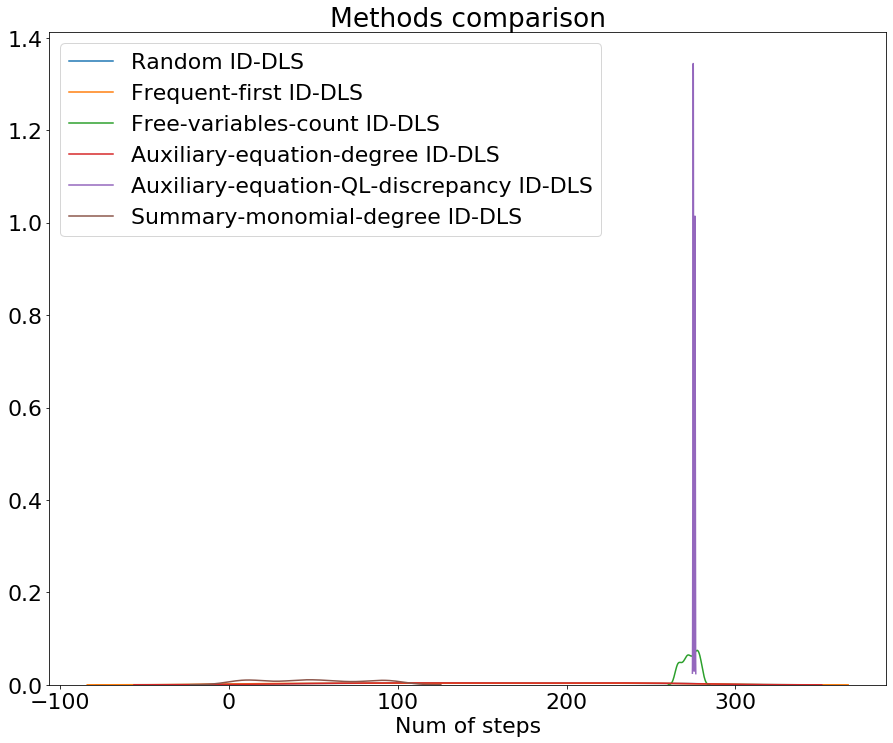

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(iddfs_random, label="Random ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_frequent_first, label="Frequent-first ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_free_variables_count, label="Free-variables-count ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_auxiliary_equation_degree, label="Auxiliary-equation-degree ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_auxiliary_equation_quadratic_discrepancy, label="Auxiliary-equation-QL-discrepancy ID-DLS", kde=True, hist=False)
sns.distplot(iddfs_summary_monomial_degree, label="Summary-monomial-degree ID-DLS", kde=True, hist=False)
plt.legend()
plt.xlabel("Num of steps")
plt.title("Methods comparison");

Auxiliary-equation-QL-discrepancy ID-DFS is not performing well, so let's remove it.

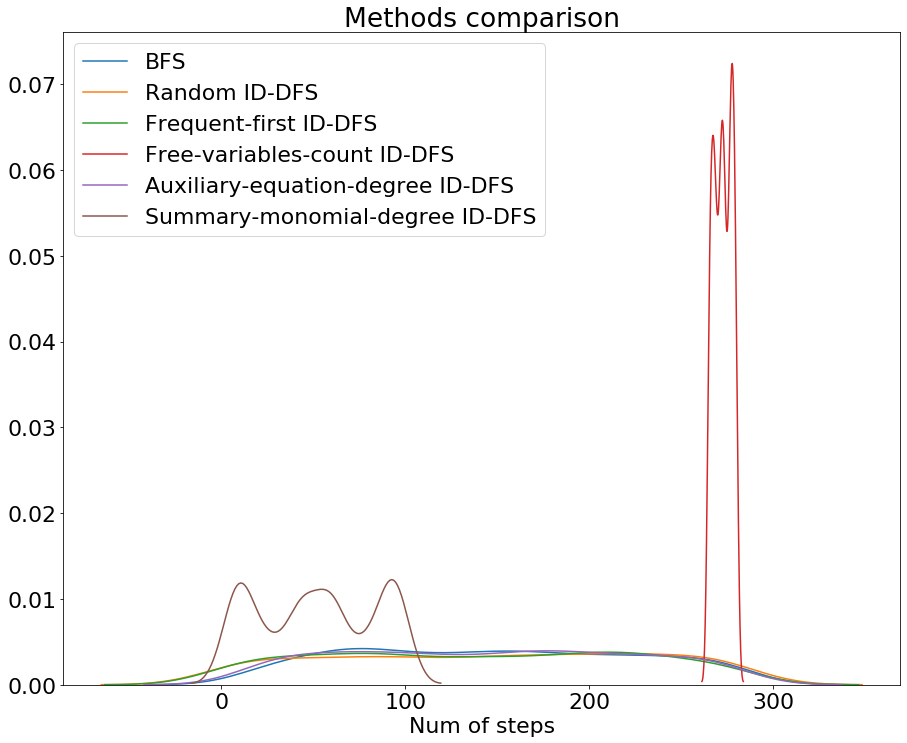

In [18]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(iddfs_random, label="Random ID-DFS", kde=True, hist=False)
sns.distplot(iddfs_frequent_first, label="Frequent-first ID-DFS", kde=True, hist=False)
sns.distplot(iddfs_free_variables_count, label="Free-variables-count ID-DFS", kde=True, hist=False)
sns.distplot(iddfs_auxiliary_equation_degree, label="Auxiliary-equation-degree ID-DFS", kde=True, hist=False)
sns.distplot(iddfs_summary_monomial_degree, label="Summary-monomial-degree ID-DFS", kde=True, hist=False)
plt.legend()
plt.xlabel("Num of steps")
plt.title("Methods comparison");

Free-variables-count ID-DFS is not performing well, so let's remove it.

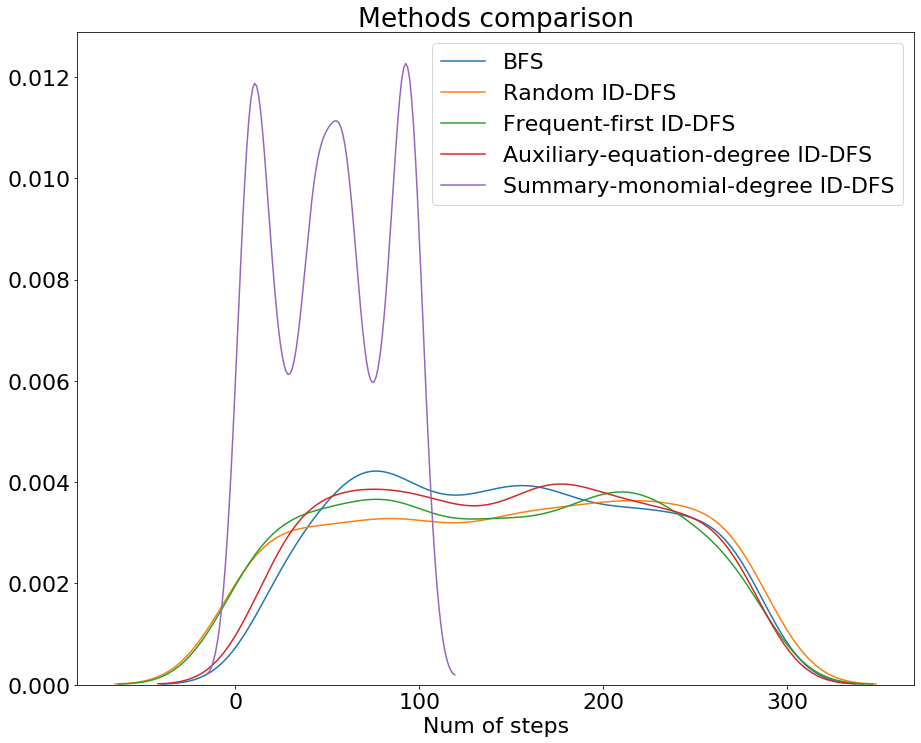

In [19]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(iddfs_random, label="Random ID-DFS", kde=True, hist=False)
sns.distplot(iddfs_frequent_first, label="Frequent-first ID-DFS", kde=True, hist=False)
sns.distplot(iddfs_auxiliary_equation_degree, label="Auxiliary-equation-degree ID-DFS", kde=True, hist=False)
sns.distplot(iddfs_summary_monomial_degree, label="Summary-monomial-degree ID-DFS", kde=True, hist=False)
plt.legend()
plt.xlabel("Num of steps")
plt.title("Methods comparison");


In [13]:
import pandas as pd

def flatten(lst):
    return [item for sublist in lst for item in sublist]

steps_df = pd.DataFrame({
    'steps': iddfs_random + iddfs_frequent_first + iddfs_free_variables_count + iddfs_auxiliary_equation_degree + iddfs_auxiliary_equation_quadratic_discrepancy + iddfs_summary_monomial_degree,
    'method': flatten([[method]*len(iddfs_random) for method in ["Random", "FF", "FVC", "AED", "AEQD", "SMD"]])
})

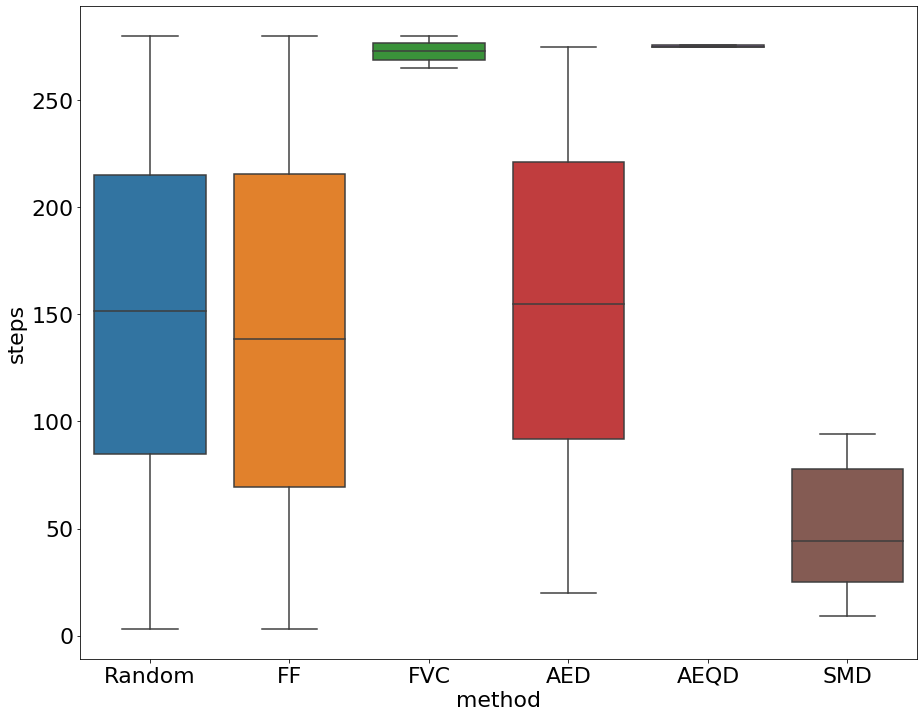

In [15]:
plt.figure(figsize=(15, 12))
sns.boxplot('method', 'steps', data=steps_df)
plt.savefig("examples/xSigmoid/box.png")

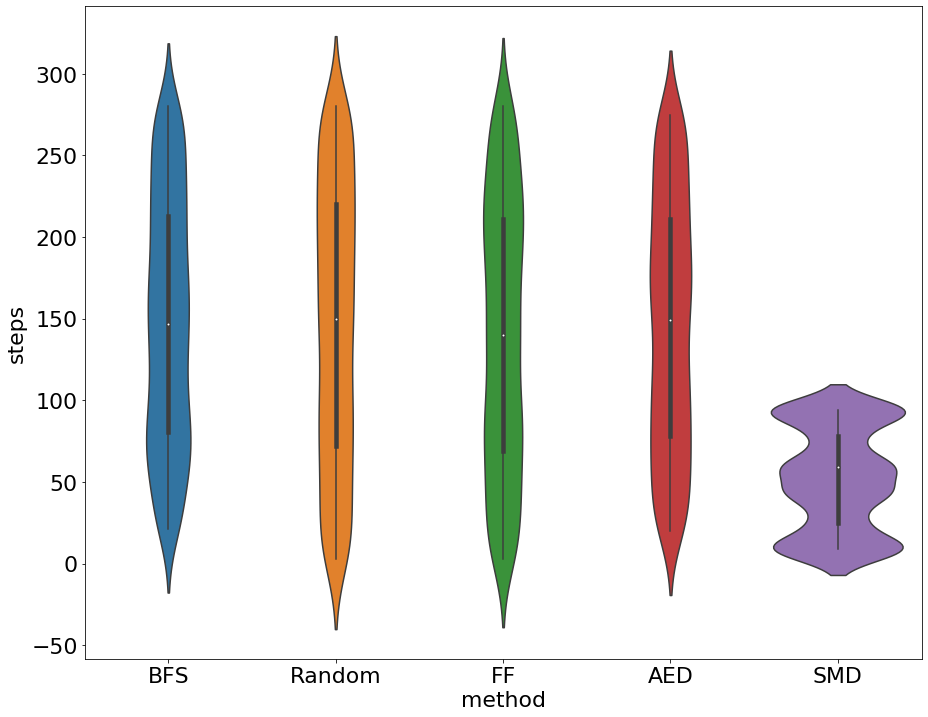

In [39]:
plt.figure(figsize=(15, 12))
sns.violinplot('method', 'steps', data=steps_df)

For current example the best heuristic is Summary-monomial-degree (SMD). Others almost does not change number of steps. 